## Cooperation and the iterated prisoner's dilemma

As we discussed in lecture, there is no one best strategy for playing an iterated prisoner's dilemma (IPD).  

In this notebook, we'll use the [axelrod](https://axelrod.readthedocs.io/en/stable/index.html) package to replicate an Axelrod-style tournament in which different strategies for playing the IPD are pitted against one another.

In [ ]:
#!pip install axelrod

In [131]:
from IPython.core.display import HTML
from datascience import *

import matplotlib
from matplotlib import animation as animation
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

import networkx as nx
import axelrod as axl

# suppress annoying matplotlib warnings
import warnings
warnings.filterwarnings("ignore")

We'll start by looking at several strategies:

* **Cooperator** - always cooperates
* **Defector** - always defects
* **Tit-For-Tat (TFT)** - start by cooperating, then mimic opponent's previous action
* **Alternator** - alternates between cooperation and defection
* **Random** - picks a random action

In [132]:
players = [axl.Cooperator(),
           axl.Defector(),
           axl.TitForTat(),
           axl.Alternator(),
           axl.Random()
          ]
players

[Cooperator, Defector, Tit For Tat, Alternator, Random: 0.5]

Now we'll set up a tournament.
See the [Axelrod tutorial](https://axelrod.readthedocs.io/en/stable/tutorials/getting_started/tournament.html).

We'll have players play iterated prisoner's dilemmas that have 2000 iterations per match; we'll repeat each pairing 5 times.

In [133]:
tournament1 = axl.Tournament(players,
                             turns=2000,
                             repetitions=5)

Let's inspect the payoff matrix of the game:

In [134]:
tournament1.game

Axelrod game: (R,P,S,T) = (3, 1, 0, 5)

In [135]:
results1 = tournament1.play()
results1.ranked_names

Analysing: 100%|██████████| 25/25 [00:00<00:00, 149.27it/s]


['Defector', 'Alternator', 'Random: 0.5', 'Tit For Tat', 'Cooperator']

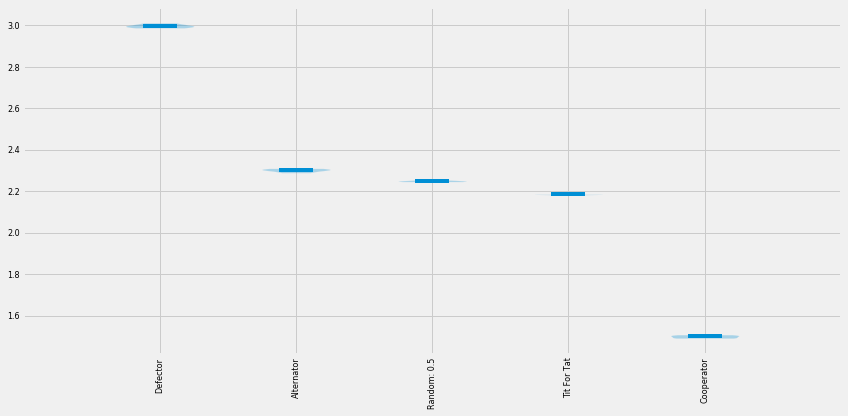

In [136]:
plot = axl.Plot(results1)
p = plot.boxplot()
p.show();

We can also look at how well the different strategies fared against one another.

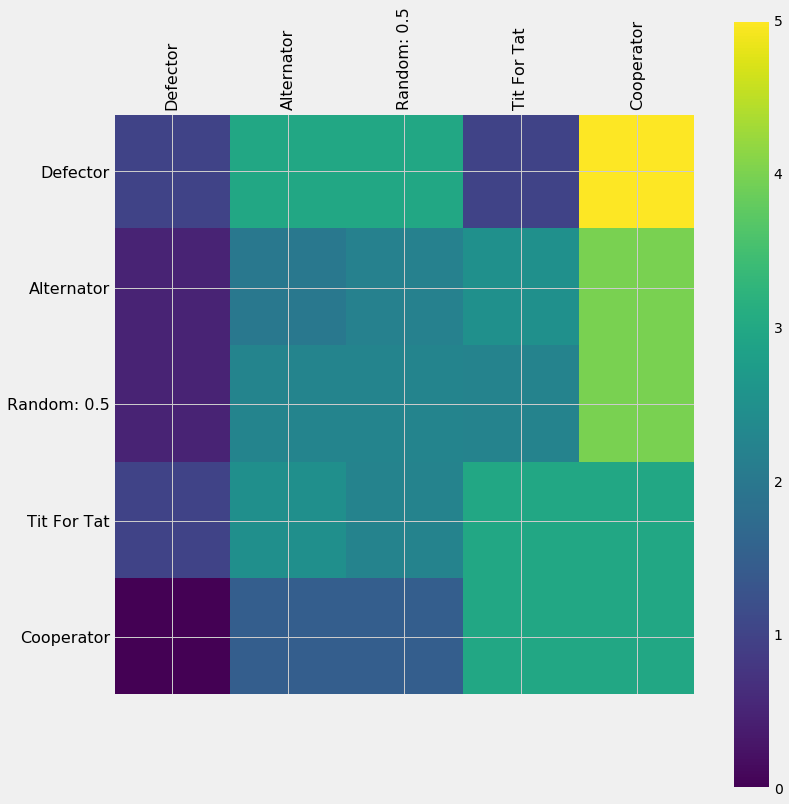

In [138]:
p = plot.payoff()
p.show()

Note that how well each strategy performed is a function of the other strategies in the tournament.

## Populations playing iterated prisoner's dilemmas

In [139]:
eco = axl.Ecosystem(results1)
eco.reproduce(500)

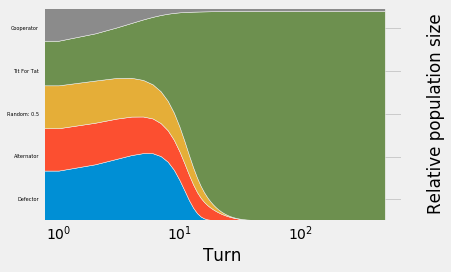

In [140]:
plot = axl.Plot(results1)
p = plot.stackplot(eco)
p.show();